### Here we do the exact same workflow and analysis as with AI4CellFate, but instead of using latent space engineering with the contrastive and covariance losses, we put their weights to zero

In [5]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
sys.path.append(os.path.abspath("../..")) 
from src.training.train import train_autoencoder, train_cellfate
from sklearn.model_selection import train_test_split
from src.models import Encoder, Decoder, Discriminator, mlp_classifier
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from src.utils import *

In [2]:
# Loading the first time point of the time-lapse microscopy data
x_train = np.load('../../data/images/train_images_augmented.npy')[:,0,:,:]
y_train = np.load('../../data/labels/train_labels_augmented.npy')
x_test = np.load('../../data/images/test_images.npy')[:,0,:,:]
y_test = np.load('../../data/labels/test_labels.npy')

# Print the shape of the data
print("x_train.shape: ", x_train.shape, "y_train.shape: ", y_train.shape, "x_test.shape: ", x_test.shape, "y_test.shape: ", y_test.shape)

x_train.shape:  (2184, 20, 20) y_train.shape:  (2184,) x_test.shape:  (277, 20, 20) y_test.shape:  (277,)


# Train Model (lambdas of contrastive and covariance losses set to zero)

In [3]:
# Repeat results with 3 different seeds
seed = 42
output_dir = f"../results/aae_only_seed{seed}"
config_ae = {
            'batch_size': 30,
            'epochs': 15,
            'learning_rate': 0.001,
            'seed': seed,
            'latent_dim': 2,
            'GaussianNoise_std': 0.003,
            'lambda_recon': 5,
            'lambda_adv': 1,
        }

config_cellfate = {
    'batch_size': 30,
    'epochs': 100,
    'learning_rate': 0.001,
    'seed': seed,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 6,
    'lambda_adv': 4,
    'lambda_cov': 0, #### HERE WE PUT THE WEIGHTS TO ZERO
    'lambda_contra': 0, #### HERE WE PUT THE WEIGHTS TO ZERO
}

results_autoencoder = train_autoencoder(config_ae, x_train)
encoder = results_autoencoder['encoder']
decoder = results_autoencoder['decoder']
discriminator = results_autoencoder['discriminator']

results_cellfate = train_cellfate(config_cellfate, encoder, decoder, discriminator, x_train, y_train, x_test, y_test) #lambda_recon=scaled_autoencoder_results['lambda_recon'], lambda_adv=scaled_autoencoder_results['lambda_adv']
encoder = results_cellfate['encoder']
decoder = results_cellfate['decoder']
discriminator = results_cellfate['discriminator']

save_model_weights_to_disk(encoder, decoder, discriminator, output_dir=output_dir)

Training with batch size: 30, epochs: 15, learning rate: 0.001, seed: 42, latent dim: 2


/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/15: Reconstruction loss: 1.2867, Adversarial loss: 0.7489, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 2/15: Reconstruction loss: 0.7749, Adversarial loss: 0.7269, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 3/15: Reconstruction loss: 0.7638, Adversarial loss: 0.7135, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 4/15: Reconstruction loss: 0.7467, Adversarial loss: 0.7116, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 5/15: Reconstruction loss: 0.7450, Adversarial loss: 0.7094, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 6/15: Reconstruction loss: 0.7531, Adversarial loss: 0.6986, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 7/15: Reconstruction loss: 0.7237, Adversarial loss: 0.7067, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 8/15: Reconstruction loss: 0.7281, Adversarial loss: 0.7037, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 9/15: Reconstruction loss: 0.7274, Adversarial loss: 0.6983, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 10/15: Reconstruction 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Training with batch size: 30, epochs: 100, learning rate: 0.001, seed: 42, latent dim: 2
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
kl_divergence[0]: 0.3258362699255198 kl_divergence[1]: 0.09901182564960202
Epoch 1/100: Reconstruction loss: 0.8699, Adversarial loss: 2.7937, Contrastive loss: 0.0000, Covariance loss: 0.0000, lamdba recon: 6.0000, lambda adv: 4.0000, lambda cov: 0.0000, lambda contra: 0.0000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
kl_divergence[0]: 0.1005440108146139 kl_divergence[1]: 0.06435218186115928
Latent Space is Gaussian-distributed!
Eucledian distance: 0.6367313861846924
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5764 - loss: 0.7908 - val_accuracy: 0.5362 - val_loss: 0.8203
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5815 - loss: 0.7447 - val_accuracy: 0.5507 - val_loss: 0.7815
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5971 - 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Visualising Latent Spaces

/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


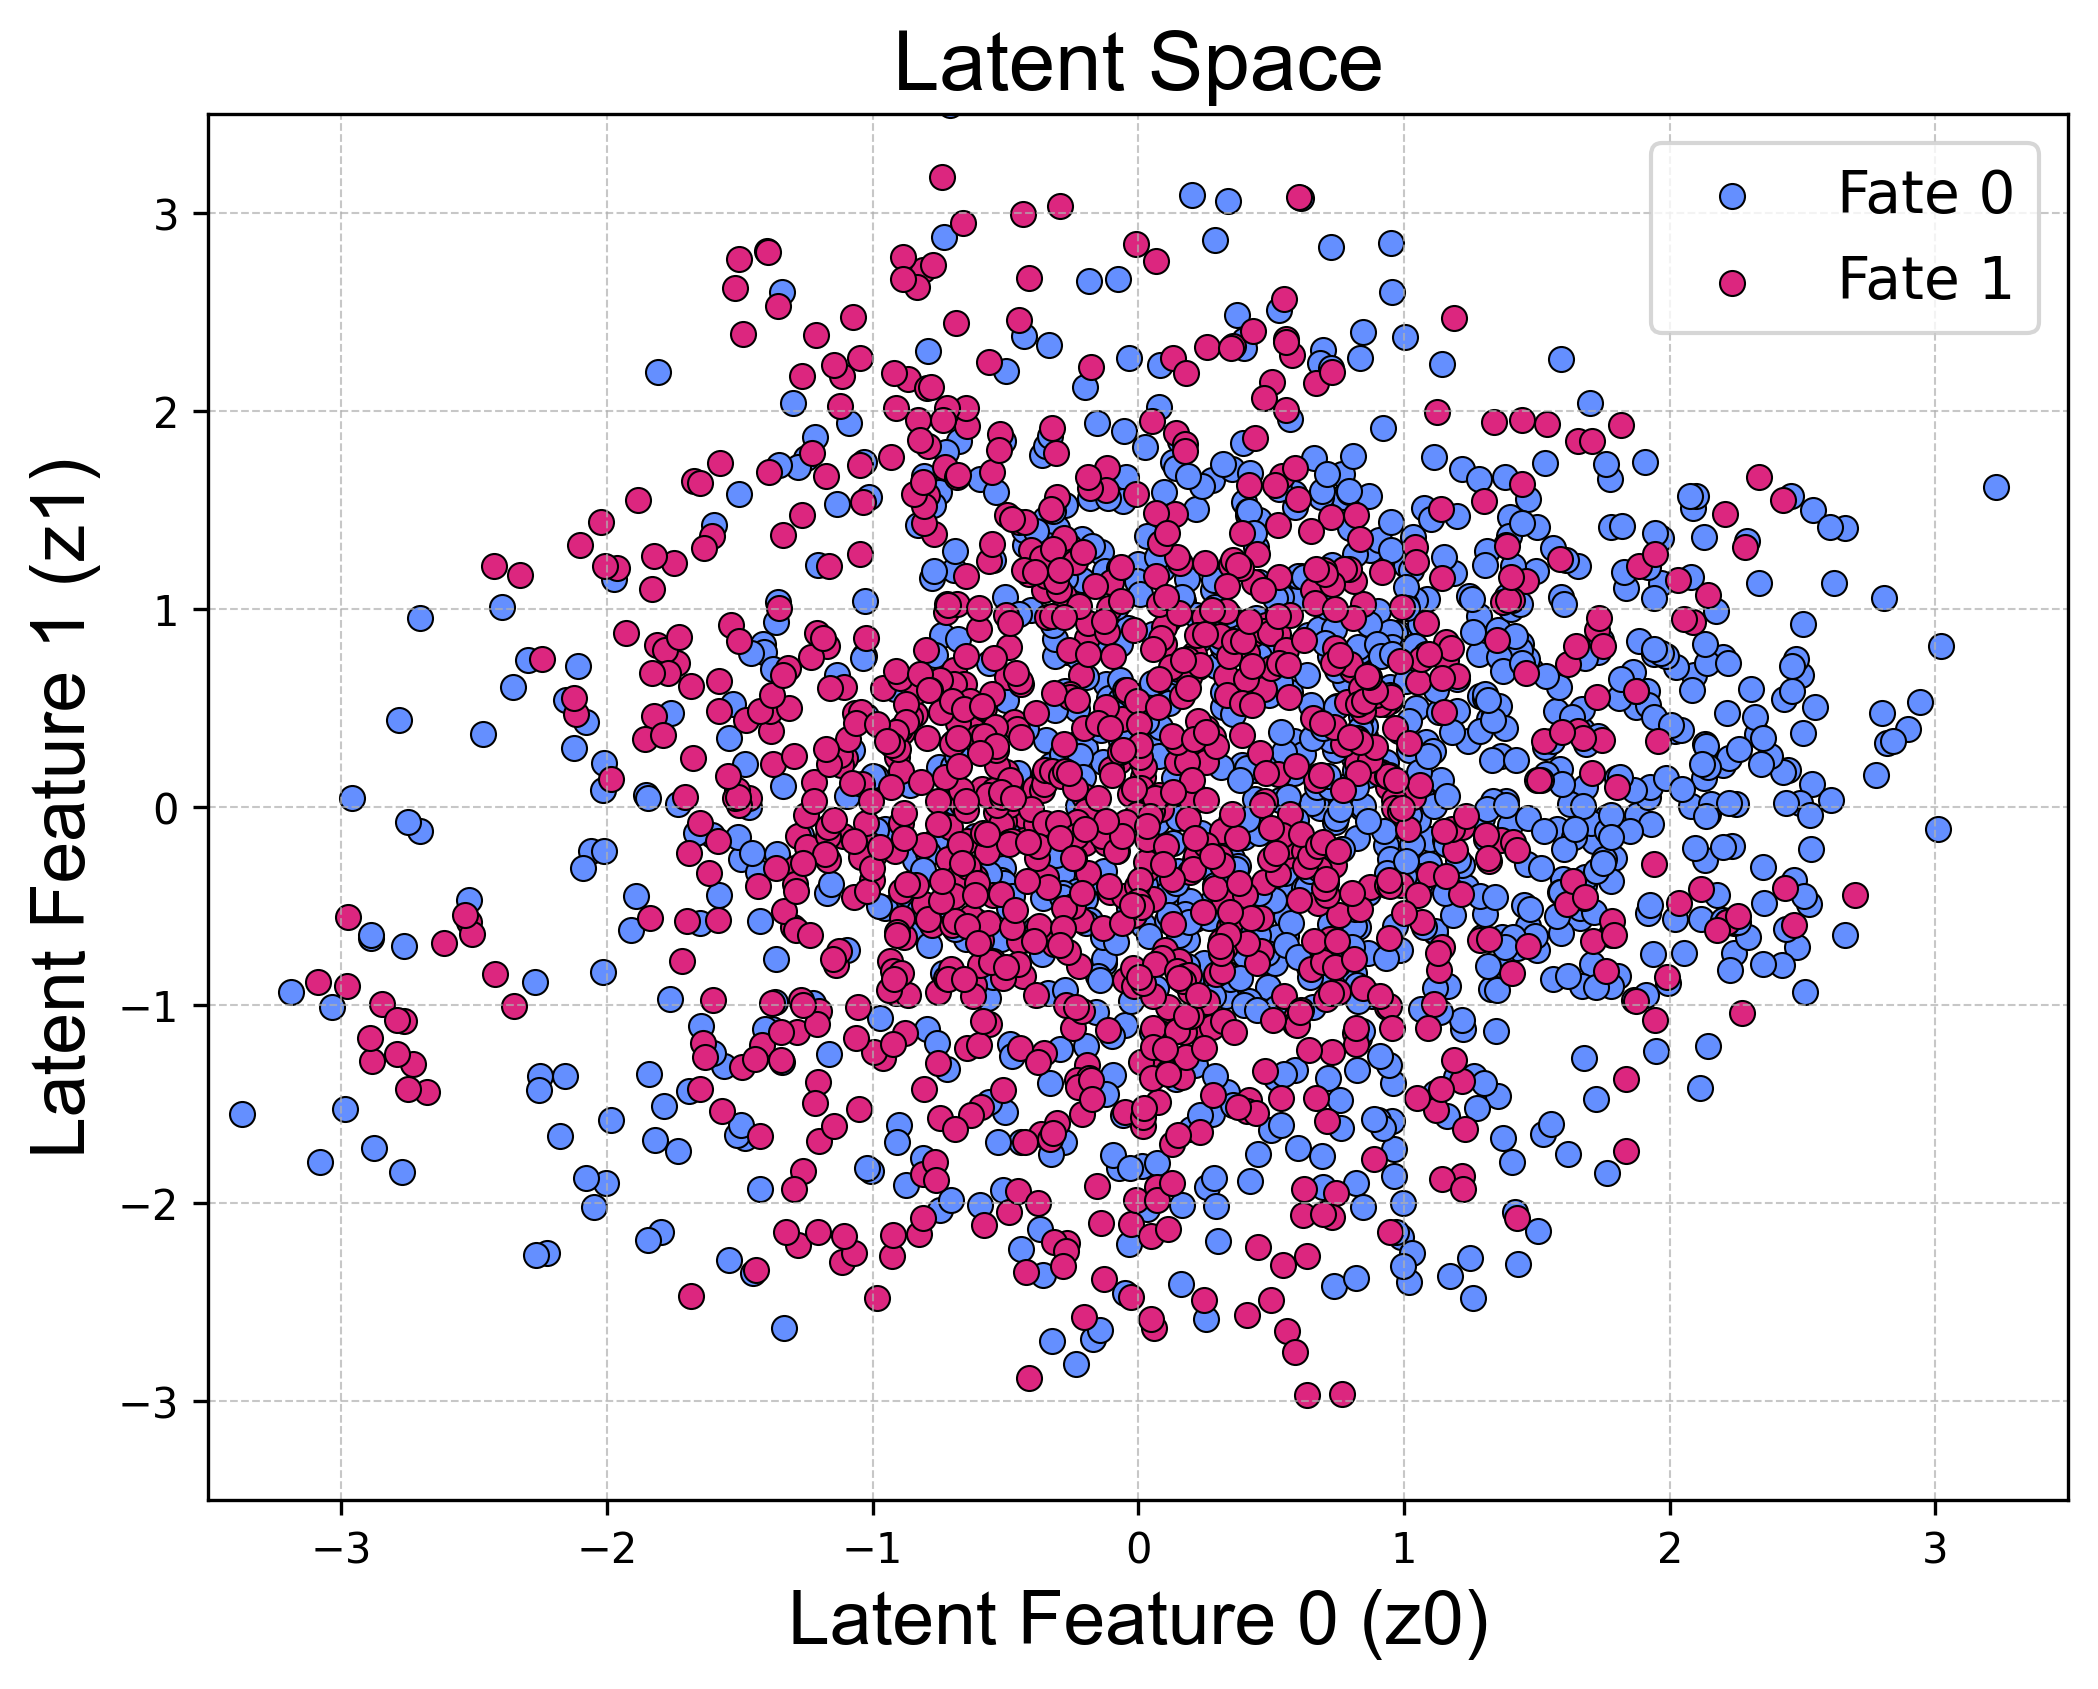

In [7]:
#### latent space correctly saved
img_shape = (x_train.shape[1], x_train.shape[2], 1)
encoder = Encoder(img_shape=img_shape, latent_dim=config_cellfate['latent_dim'], num_classes=2, gaussian_noise_std=config_cellfate['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config_cellfate['latent_dim'], img_shape=img_shape, gaussian_noise_std=config_cellfate['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config_cellfate['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoderAAE.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoderAAE.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_train)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_train == 0][:, 0], latent_2d[y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_train == 1][:, 0], latent_2d[y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("rasterised_ls_aae.eps", dpi=600, bbox_inches="tight")
plt.show()


## Test Latent Space

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


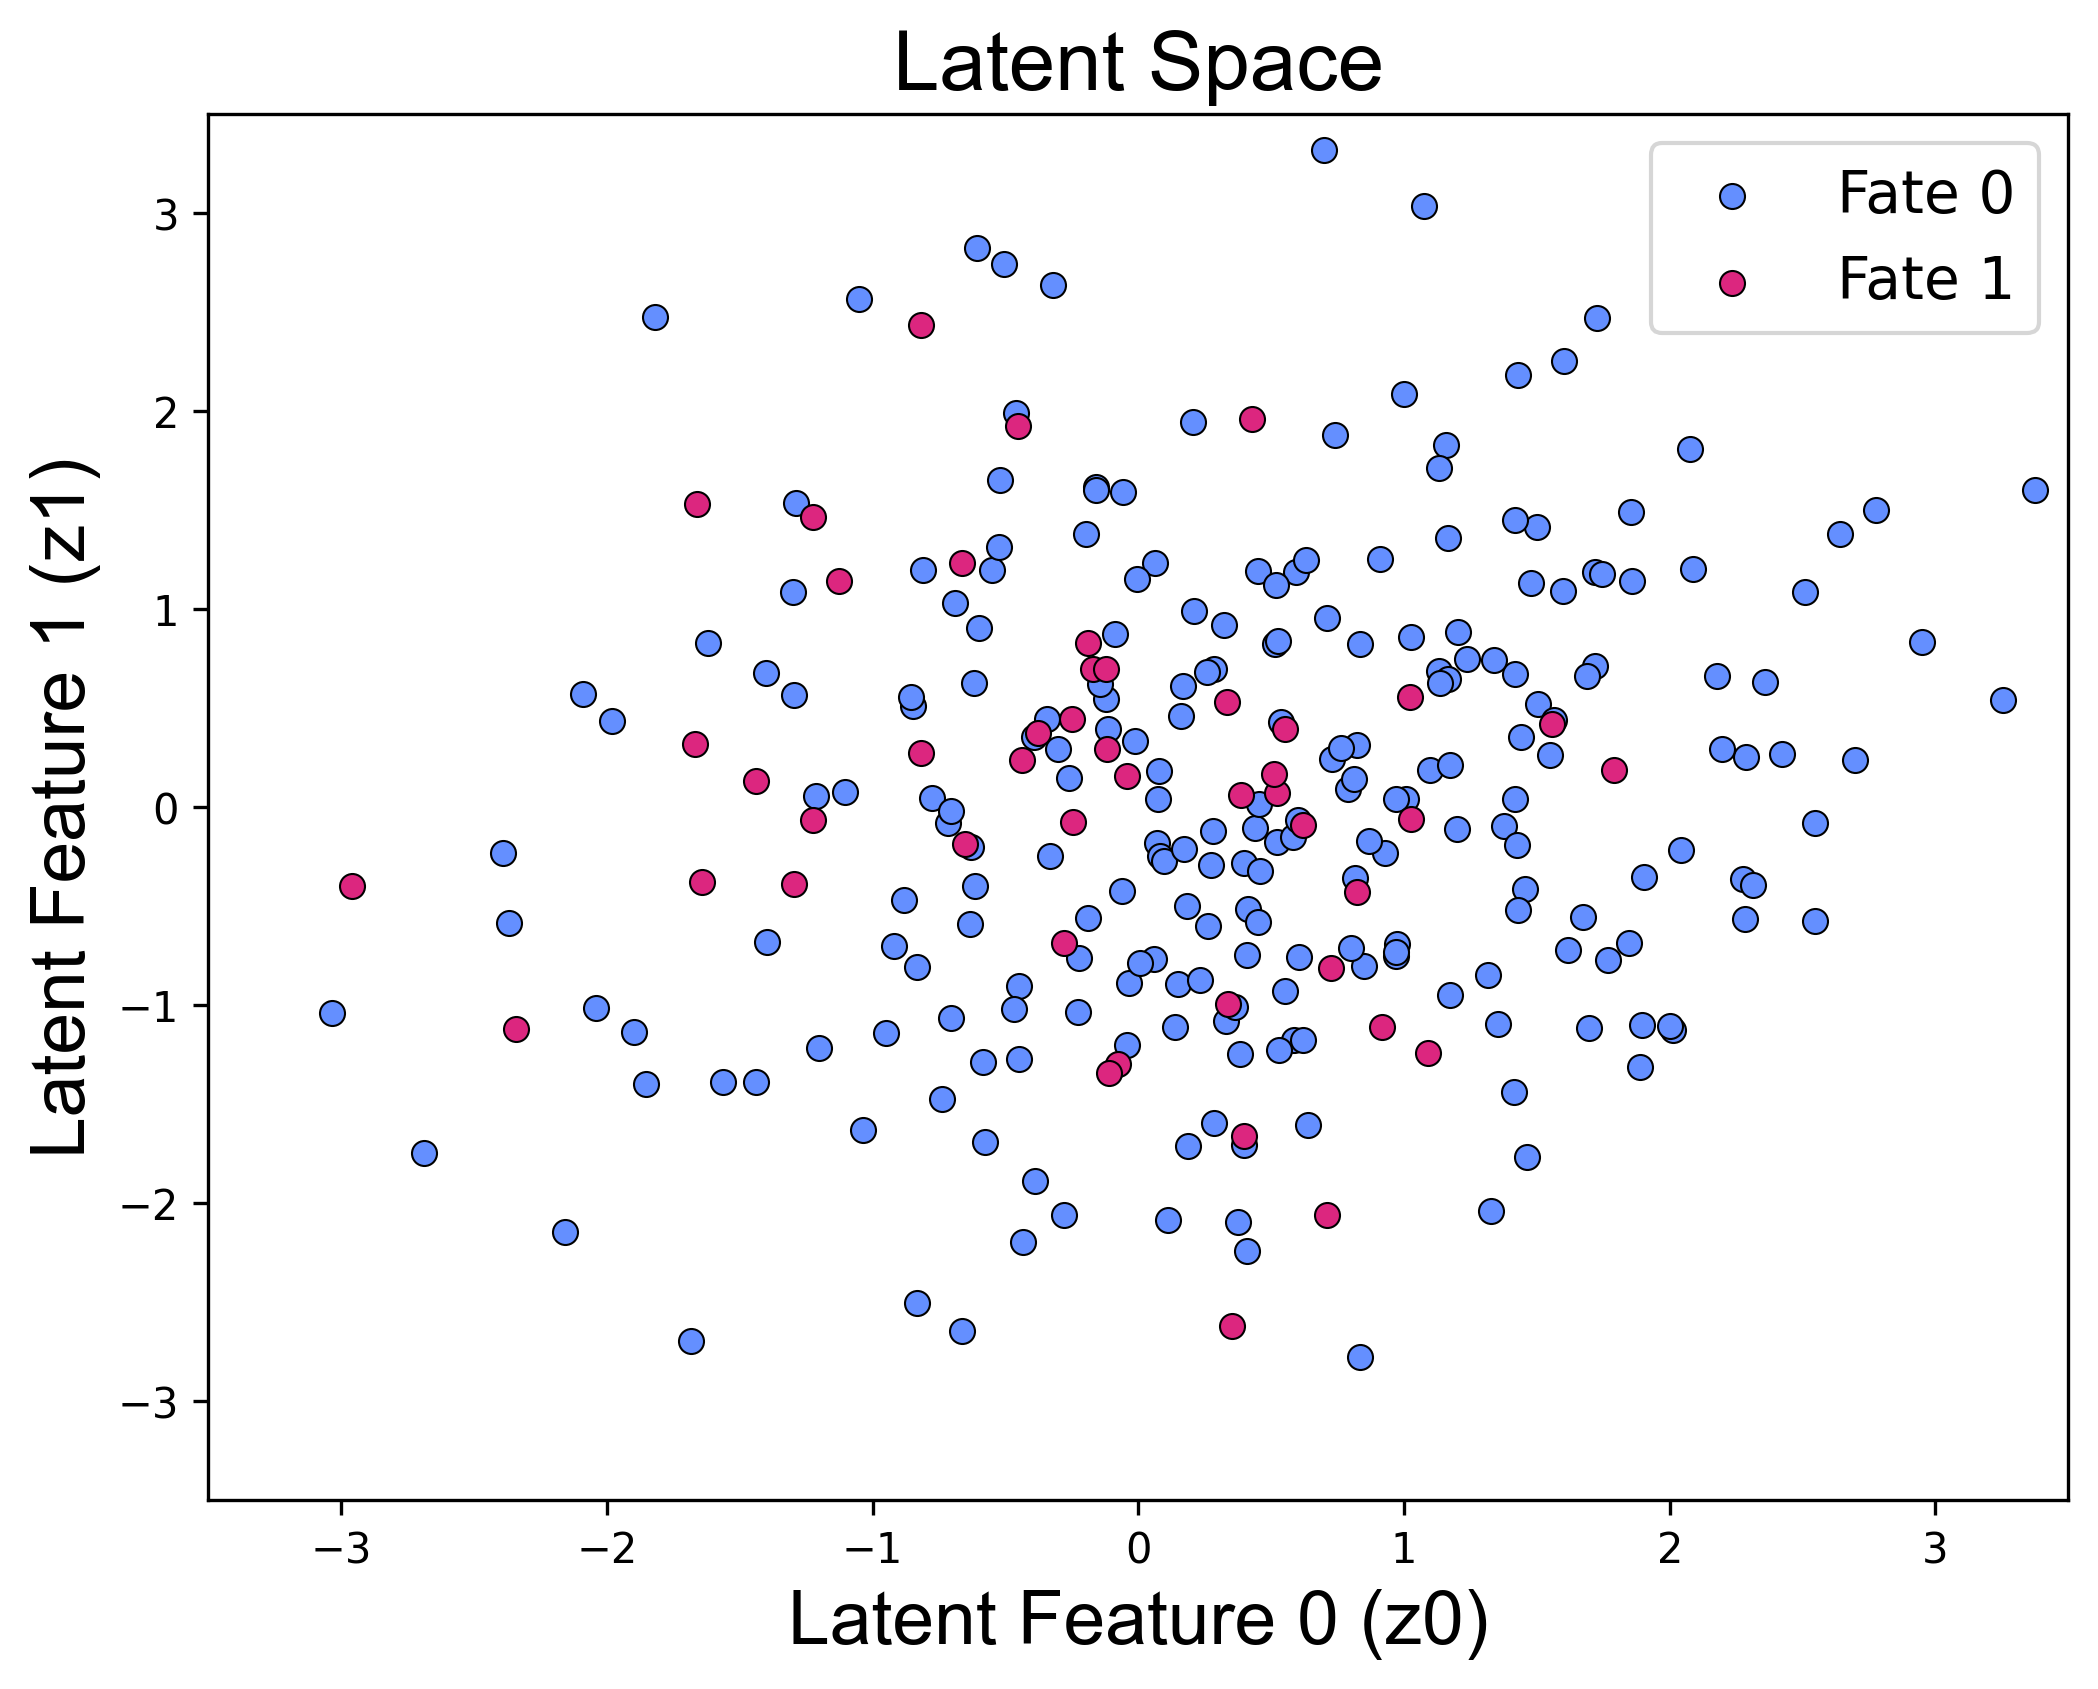

In [8]:
#### latent space correctly saved

encoder = Encoder(img_shape=img_shape, latent_dim=config_cellfate['latent_dim'], num_classes=2, gaussian_noise_std=config_cellfate['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config_cellfate['latent_dim'], img_shape=img_shape, gaussian_noise_std=config_cellfate['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config_cellfate['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoderAAE.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoderAAE.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_test)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_test == 0][:, 0], latent_2d[y_test == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_test == 1][:, 0], latent_2d[y_test == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("test_aae_noaug_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


In [9]:
from scipy.spatial.distance import euclidean
# Compute centroids
centroid_class_0 = np.mean(encoder.predict(x_test)[y_test == 0], axis=0)
centroid_class_1 = np.mean(encoder.predict(x_test)[y_test == 1], axis=0)

# Compute Euclidean distance between centroids
distance = euclidean(centroid_class_0, centroid_class_1)
print(f"Distance between class centroids: {distance:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Distance between class centroids: 0.6018


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


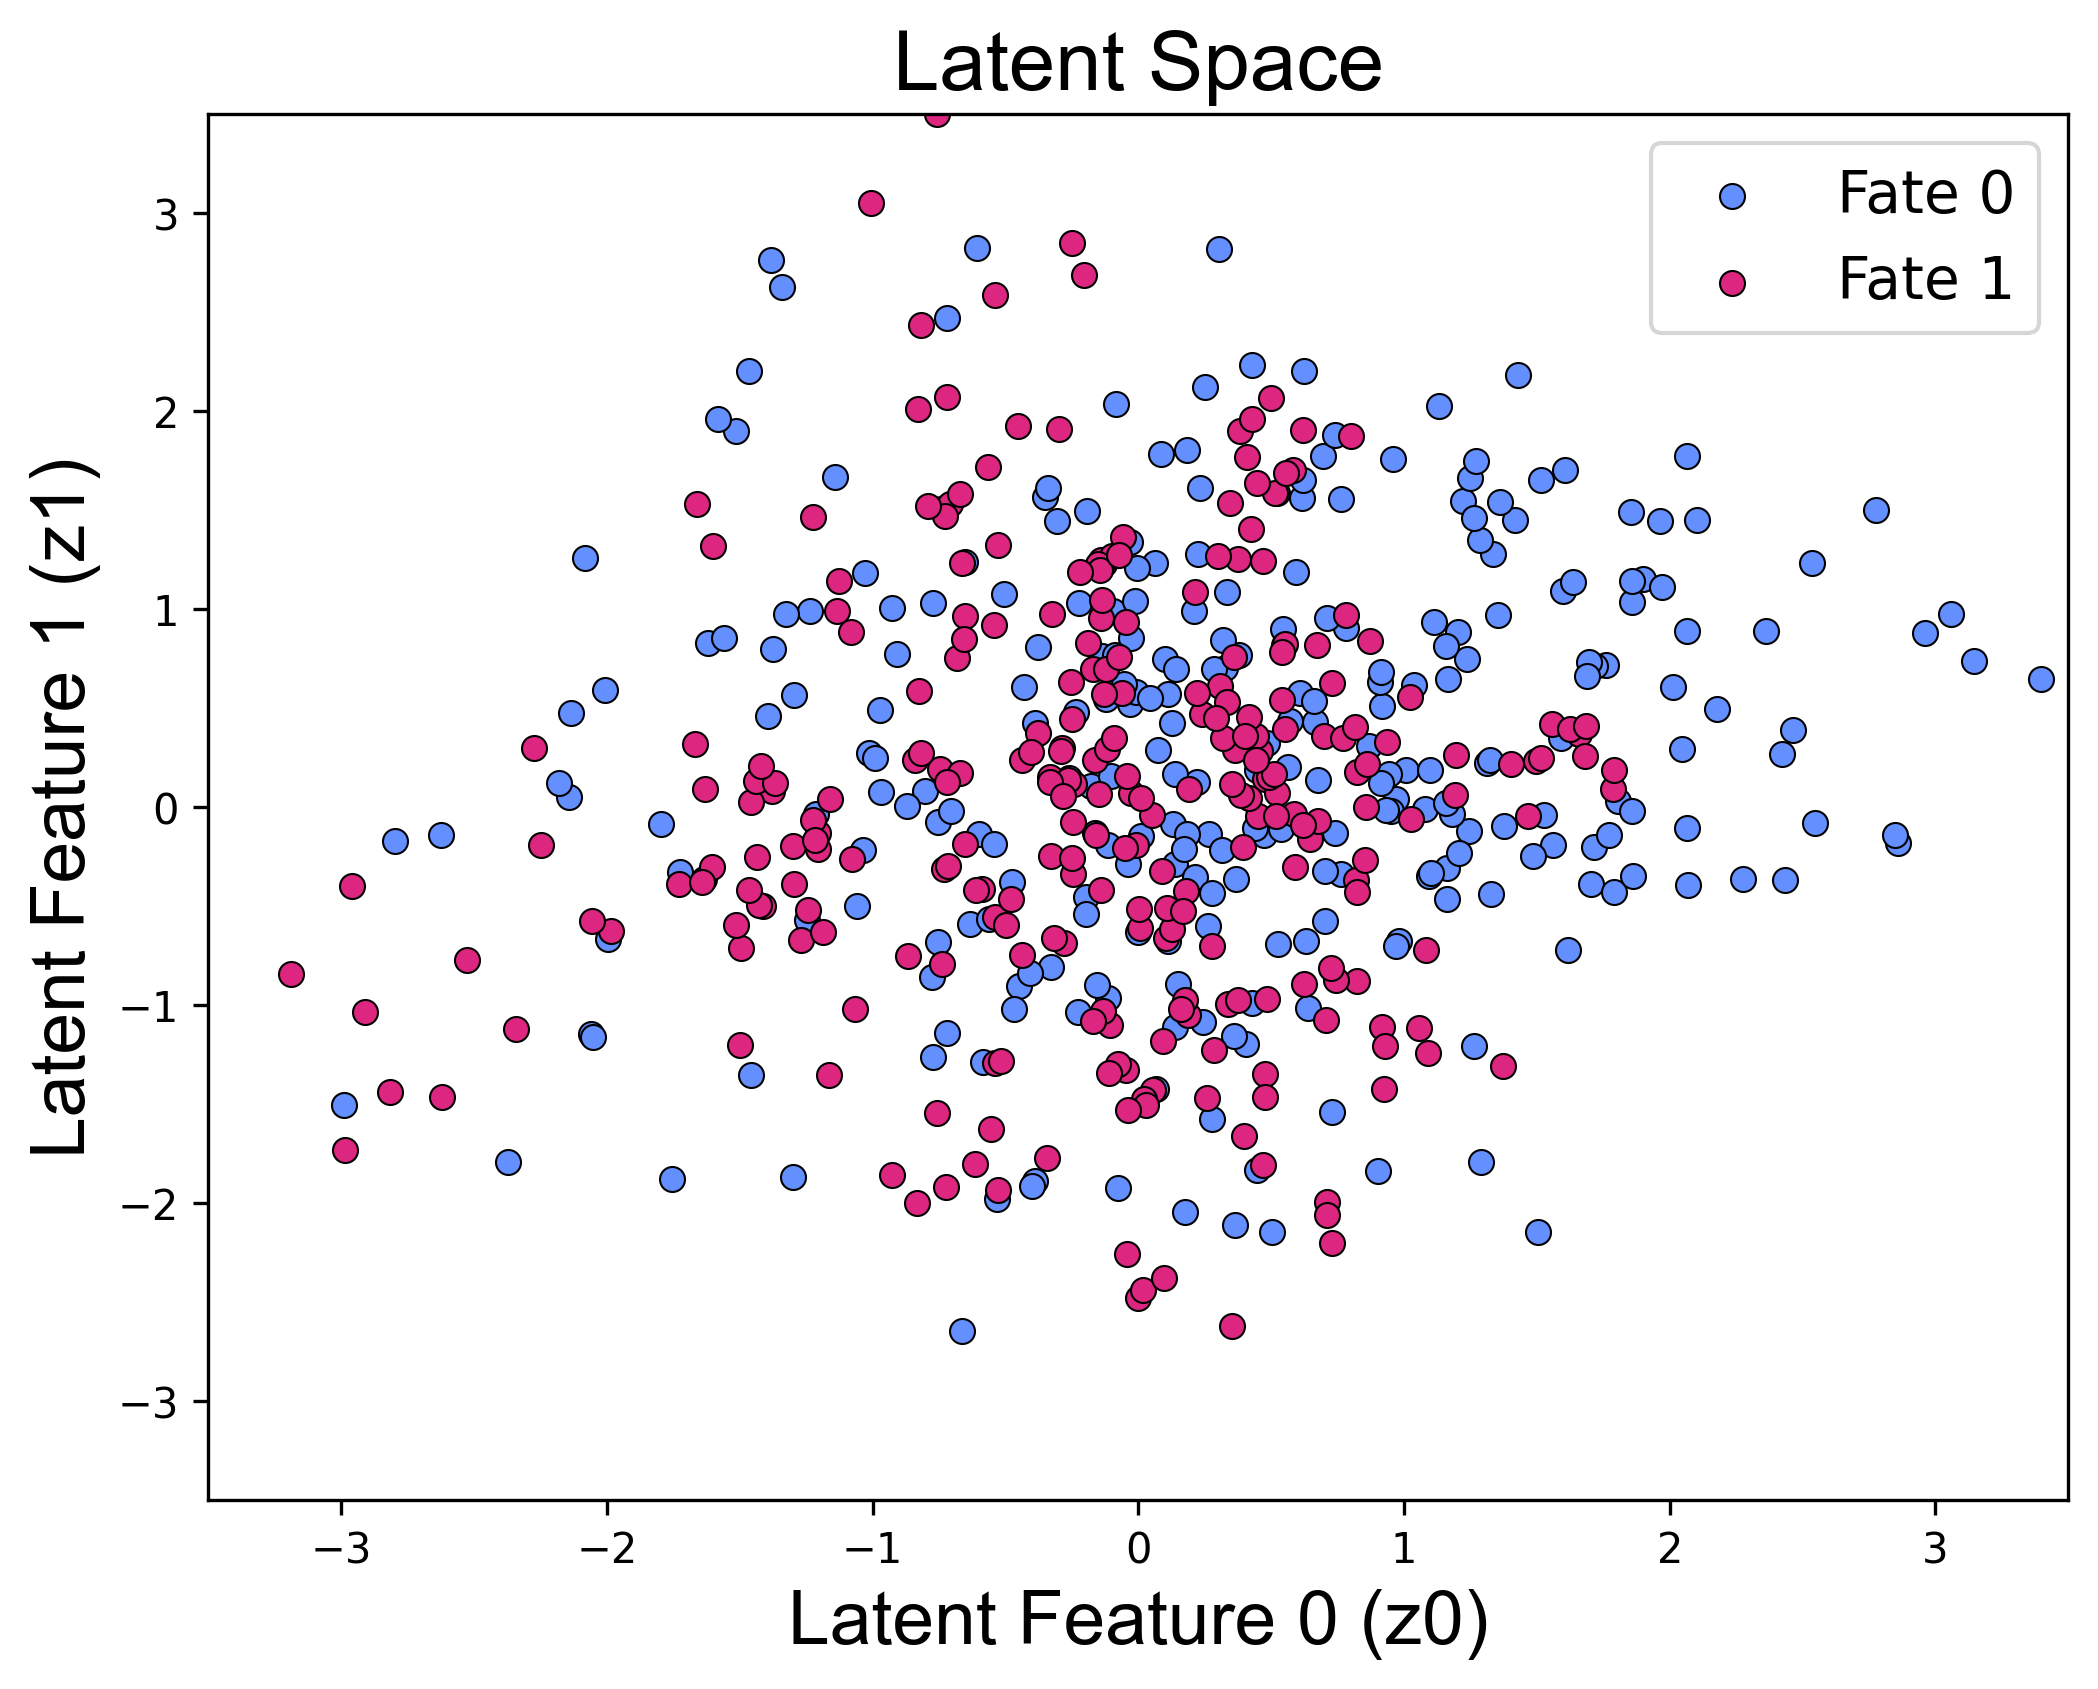

In [10]:
from src.preprocessing.preprocessing_functions import *

encoder = Encoder(img_shape=img_shape, latent_dim=config_cellfate['latent_dim'], num_classes=2, gaussian_noise_std=config_cellfate['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config_cellfate['latent_dim'], img_shape=img_shape, gaussian_noise_std=config_cellfate['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config_cellfate['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoderAAE.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoderAAE.weights.h5")

augmented_x_test_for_visuals, augmented_y_test_for_visuals = augment_dataset(x_test, y_test, augmentations)

# Predict the latent representations
latent_2d = encoder.predict(augmented_x_test_for_visuals)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[augmented_y_test_for_visuals == 0][:, 0], latent_2d[augmented_y_test_for_visuals == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[augmented_y_test_for_visuals == 1][:, 0], latent_2d[augmented_y_test_for_visuals == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("test_aae_aug_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


In [11]:
from scipy.spatial.distance import euclidean
# Compute centroids
centroid_class_0 = np.mean(encoder.predict(augmented_x_test_for_visuals)[augmented_y_test_for_visuals == 0], axis=0)
centroid_class_1 = np.mean(encoder.predict(augmented_x_test_for_visuals)[augmented_y_test_for_visuals == 1], axis=0)

# Compute Euclidean distance between centroids
distance = euclidean(centroid_class_0, centroid_class_1)
print(f"Distance between class centroids: {distance:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Distance between class centroids: 0.5721


# Classifying from the Latent Space

In [ ]:
config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 5, 
    'lambda_adv': 0.05,
    'lambda_clf': 0.05,
    'lambda_cov': 0.1,
}

img_shape = (x_train.shape[1], x_train.shape[2], 1)
confusion_matrices_aae = np.zeros((3,2,2))
for model in range(3):

    encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
    decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
    discriminator = Discriminator(latent_dim=config['latent_dim']).model

    if model == 0:
        encoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/aae_only_seed42_encoder.weights.h5")
        decoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/aae_only_seed42_decoder.weights.h5")

    if model == 1:
        encoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/aae_only_seed43_encoder.weights.h5")
        decoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/aae_only_seed43_decoder.weights.h5")
   
    if model == 2:
        encoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/aae_only_seed44_encoder.weights.h5")
        decoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/aae_only_seed44_decoder.weights.h5")

    tf.keras.utils.set_random_seed(config['seed'])

    classifier = mlp_classifier(latent_dim=config['latent_dim']) #[:, [3, 8]] 

    # Train the classifier
    classifier.compile(loss='sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=config['learning_rate']), metrics=['accuracy'])
    classifier.summary()

    x_val, x_test_, y_val, y_test_ = train_test_split(encoder.predict(x_test), y_test, test_size=0.5, random_state=42) # 42 random state

    history = classifier.fit(encoder.predict(x_train), y_train, batch_size=config['batch_size'], epochs=config['epochs'], validation_data=(x_val, y_val)) # 

    num_classes = len(np.unique(y_train))
    y_pred = classifier.predict(x_test_)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_, y_pred_classes)

    class_sums = cm.sum(axis=1, keepdims=True)
    conf_matrix_normalized = cm / class_sums

    print(conf_matrix_normalized)
    confusion_matrices_aae[model] = conf_matrix_normalized

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In [ ]:
print(np.mean(confusion_matrices_aae, axis=0))
print(np.std(confusion_matrices_aae, axis=0))
precision = np.mean(confusion_matrices_aae, axis=0)[0,0] / (np.mean(confusion_matrices_aae, axis=0)[0,0] + np.mean(confusion_matrices_aae, axis=0)[1,0])
print("Model precision", precision)

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(np.mean(confusion_matrices_aae, axis=0), interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
#plt.savefig("mean_confmatrix_aae.pdf", format="pdf", dpi=300, pad_inches=0)
plt.show()